In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/1.jpg" "/content/"

cp: '/content/1.jpg' and '/content/1.jpg' are the same file


**Soal nomor 3**

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.setrecursionlimit(10000)

Text(0.5, 1.0, 'Asli')

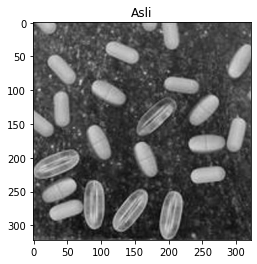

In [ ]:
img = cv2.imread("/content/1.jpg", cv2.IMREAD_GRAYSCALE) #read image
plt.imshow(img, cmap = "gray")
plt.title('Asli')

Text(0.5, 1.0, 'Histogram Image Asli')

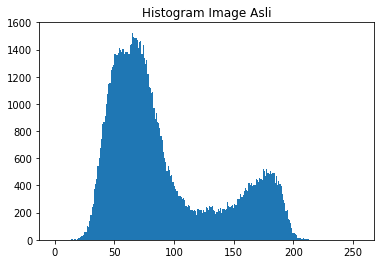

In [ ]:
#mencetak histogram image asli
hist1 = plt.hist(img.flatten(), 256, [0, 255])
plt.title("Histogram Image Asli")

a. Cobalah untuk mengimplementasikan metode simple/basic global thresholding terhadap citra tersebut (implementasikan algoritma yang sudah dijelaskan pada sesi kelas). Jelaskan langkah-langkah yang diterapkan secara lebih detail berdasarkan kode yang dibuat.

In [ ]:
T0=120
T=120 #estimasi T awal
#Segment the image using T to produce two groups of pixels
H, W = np.shape(img)
G1=[] #list G1
G2=[] #list G2
for x in range(0,H):
  for y in range(0,W):
    if (img[x][y] > T):
      G1.append(img[x][y]) #G1 > T
    else:
      G2.append(img[x][y]) #G2 <= T
print(G1)
print(G2)

[121, 140, 158, 181, 179, 183, 191, 194, 198, 200, 197, 197, 202, 207, 209, 209, 211, 212, 213, 213, 211, 206, 202, 202, 205, 202, 198, 191, 185, 171, 141, 121, 137, 138, 128, 126, 154, 177, 181, 180, 184, 191, 196, 201, 197, 197, 203, 207, 207, 204, 202, 200, 193, 191, 191, 186, 176, 151, 121, 146, 173, 188, 190, 189, 188, 191, 195, 200, 205, 210, 208, 206, 206, 209, 208, 200, 191, 185, 186, 175, 151, 138, 147, 158, 168, 174, 179, 180, 177, 176, 181, 186, 188, 191, 193, 196, 197, 198, 196, 193, 189, 184, 184, 182, 185, 188, 190, 182, 157, 124, 126, 156, 165, 167, 170, 175, 181, 188, 187, 188, 192, 195, 193, 190, 187, 185, 178, 178, 180, 177, 168, 144, 135, 163, 182, 183, 182, 181, 184, 188, 190, 193, 192, 191, 189, 189, 192, 194, 189, 183, 180, 181, 172, 147, 129, 143, 159, 170, 180, 186, 186, 181, 179, 185, 190, 190, 190, 192, 195, 197, 199, 199, 196, 193, 191, 187, 184, 186, 188, 191, 188, 174, 148, 122, 122, 121, 123, 127, 156, 162, 163, 164, 168, 175, 180, 181, 182, 185, 185, 183,

In [ ]:
a=G1
b=G2
#Compute the average grey levels of pixels in G1 to give μ1 and G2 to give μ2
mu1 = sum(a) / len(a) #μ1
mu2 = sum(b) / len(b) #μ2
T0=T
T = ((mu1 + mu2)/2) #menghitung T baru
print(T) #mencetak nilai T baru

115.87330820892947


Text(0.5, 1.0, 'Binary image')

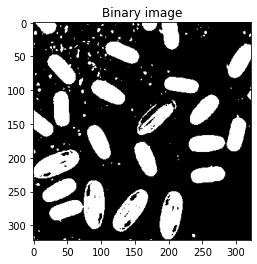

In [ ]:
new_T = T
#Mengaplikasikan nilai threshold baru
ret, binary_img = cv2.threshold(img,new_T,255,cv2.THRESH_BINARY)
#mencetak binary image
plt.imshow(binary_img,cmap='gray')
plt.title('Binary image')

Text(0.5, 1.0, 'Histogram Binary Image')

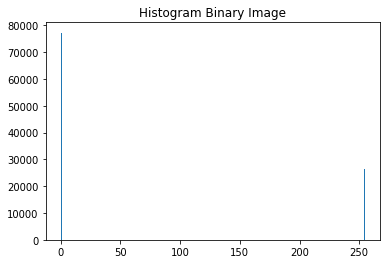

In [ ]:
#mencetak histogram binary image
hist2 = plt.hist(binary_img.flatten(), 256, [0, 255])
plt.title("Histogram Binary Image")

b. Cobalah untuk terlebih dahulu menerapkan metode image enhancement sebelum menerapkan threshold terhadap citra tersebut. Bandingkan dengan hasil jka langsung diterapkan threshold terhadap citra (seperti pada bagian sebelumnya) (diasumsikan segmentasi yang dilakukan bertujuan untuk memisahkan bagian biji dan bagian background).

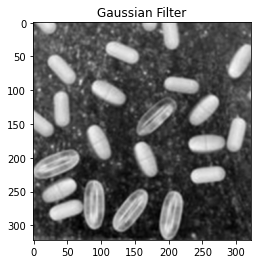

In [ ]:
#Gaussian filter
gauss_image = cv2.GaussianBlur(img, (5,5),0)
plt.imshow(gauss_image, cmap = "gray")
plt.title('Gaussian Filter')
plt.show()



---





---



---





---



Text(0.5, 1.0, 'Histogram enhancement image')

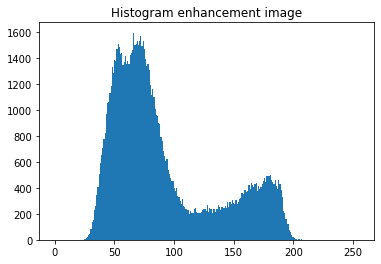

In [ ]:
#mencetak histogram enhancement image
hist3 = plt.hist(gauss_image.flatten(), 256, [0, 255])
plt.title("Histogram enhancement image")

Text(0.5, 1.0, 'Enhancement binary image')

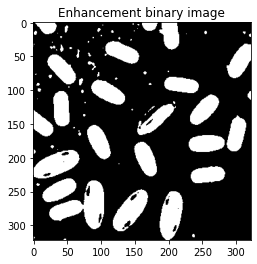

In [ ]:
new_T = T
#Mengaplikasikan nilai threshold baru
ret, bin_img = cv2.threshold(gauss_image,new_T,255,cv2.THRESH_BINARY)
#mencetak binary image
plt.imshow(bin_img,cmap='gray')
plt.title('Enhancement binary image')

Text(0.5, 1.0, 'Histogram Enhancement Binary Image')

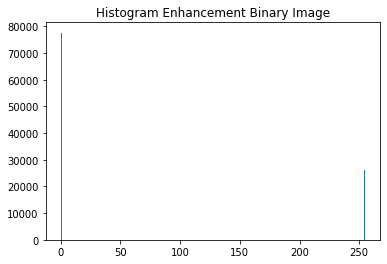

In [ ]:
#mencetak histogram binary enhancement image
hist4 = plt.hist(bin_img.flatten(), 256, [0, 255])
plt.title("Histogram Enhancement Binary Image")

Text(0.5, 1.0, 'Enhancement Binary Image')

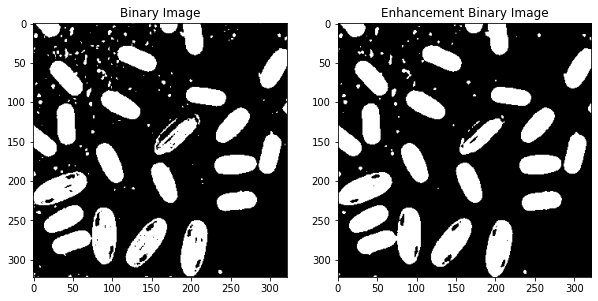

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
plt.imshow(binary_img,cmap='gray')
plt.title('Binary Image')

plt.subplot(1, 2, 2)
plt.imshow(bin_img,cmap='gray')
plt.title('Enhancement Binary Image')



> Perbandingan : gambar binary dengan mengaplikasian enhancement terlebih dahulu memiliki noise titik lebih sedikit dibandingkan dengan gambar binary tangpa enhancement.



**Nomor 4**

Apakah anda menyelesaikan tugas/pekerjaan ini dengan jujur dan bertanggung jawab, tidak melakukan tindakan kecurangan, pelanggaran, plagiasi, mencontek, saling tukar-menukar jawaban, copy paste jawaban?

> Iya, saya menyelesaikan tugas/pekerjaan ini dengan jujur dan bertanggung jawab

